In [ ]:
import nltk
from nltk.corpus import twitter_samples

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
from nltk.tokenize import TweetTokenizer


In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
import re
import pandas as pd


In [ ]:
negative_tweets = twitter_samples.strings("negative_tweets.json")
df_neg = pd.DataFrame(negative_tweets, columns = ['text'])
df_neg['label'] = 0

In [ ]:
positive_tweets = twitter_samples.strings("positive_tweets.json")
df_pos = pd.DataFrame(positive_tweets, columns = ['text'])
df_pos['label'] = 1

In [ ]:
df = pd.concat([df_neg,df_pos])  # birleştirme işlemi yapıyor
df = df.sample(frac=1).reset_index(drop=True)  # rasgele gelmesini sağlıyoruz. Model alışmasın diye

In [ ]:
df.head(10)

,text,label
0,"@HelpwDms Hi. Sorry, I already have a Shawn Me...",0
1,one tree hill makes me cry a lot 😕:-(,0
2,"Aww man, I miss dancing. :(",0
3,This rain :(,0
4,i'm so inactive :(,0
5,i wanna see paper towns w/ @milesfloresss :(,0
6,Stomachache bc of a slice of cake _:(´ཀ`」 ∠):_ …,0
7,PAP of your spirit animal? — no i dont have :(...,0
8,@perriesbummy miss u! :( and speck if your onl...,0
9,"@IamComet67P Thank you, sweetest &amp; kindest...",1


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [ ]:
def clean_text(text):
  text = re.sub(r'http\S+','',text)
  text = re.sub(r'\@w+|\#','',text)
  text = re.sub(r'[^\w\s]','',text)
  return text

In [ ]:
def lowercase(text):
  return text.lower()

In [ ]:
def tokenize(text):
  return word_tokenize(text)

In [ ]:
def remove_stopwords(tokens):
  stopwords_english = set(stopwords.words('english'))
  return [word for word in tokens if word not in stopwords_english]

In [ ]:
def stem(tokens):
  stemmer = PorterStemmer()
  return [stemmer.stem(word) for word in tokens]

In [ ]:
def preprocess(text):
  text = clean_text(text)
  text = lowercase(text)
  tokens = tokenize(text)
  tokens = remove_stopwords(tokens)
  tokens = stem(tokens)
  return ' '.join(tokens)

df['text_cleaned'] = df['text'].apply(preprocess)

In [ ]:
df.head()

,text,label,text_cleaned
0,"@HelpwDms Hi. Sorry, I already have a Shawn Me...",0,helpwdm hi sorri alreadi shawn mend sponsor
1,one tree hill makes me cry a lot 😕:-(,0,one tree hill make cri lot
2,"Aww man, I miss dancing. :(",0,aww man miss danc
3,This rain :(,0,rain
4,i'm so inactive :(,0,im inact


In [ ]:
# kelime bulutu

from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import re

In [ ]:
word = FreqDist(df['text_cleaned'])
wordcloud = WordCloud(width= 400, height= 200, background_color='white').generate_from_frequencies(word)

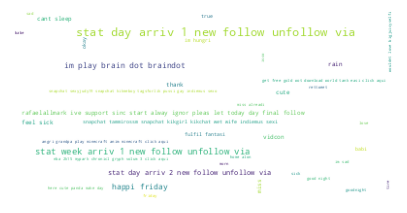

In [ ]:
plt.figure(figsize=(5,3))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# öznitelik çıkarımı

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = vectorizer.fit_transform(df['text_cleaned'])
feature_names = vectorizer.get_feature_names_out()
print("td Idf matris: ",tfidf_matrix.shape)

td Idf matris:  (10000, 10000)


In [ ]:
# model eğitimi

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(tfidf_matrix, df['label'], test_size = 0.2, random_state = 42)

In [ ]:
# KNN

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [ ]:
print("knn sonuçları")
print("Doğru: ",accuracy_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test,y_pred))
print("Hassasiyet: ",recall_score(y_test,y_pred))
print("Kesinlik: ",precision_score(y_test,y_pred))


knn sonuçları
Doğru:  0.58
F1 score:  0.2808219178082192
Hassasiyet:  0.1661600810536981
Kesinlik:  0.9060773480662984


In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)


In [ ]:
print("Random Forest sonuçları")
print("Doğruluk: ",accuracy_score(y_test,y_pred_clf))
print("F1 score: ",f1_score(y_test,y_pred_clf))
print("Hassasiyet: ",recall_score(y_test,y_pred_clf))
print("Kesinlik: ",precision_score(y_test,y_pred_clf))

Random Forest sonuçları
Doğruluk:  0.7485
F1 score:  0.7273712737127371
Hassasiyet:  0.6798378926038501
Kesinlik:  0.782051282051282


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

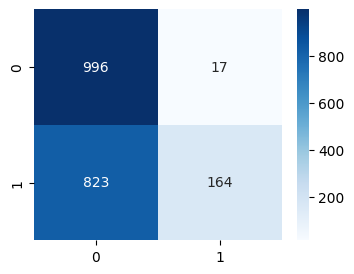

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')

<Axes: >

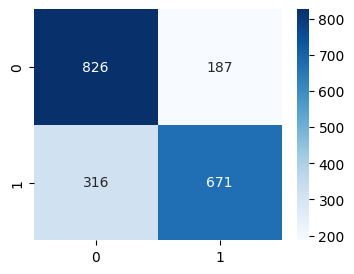

In [ ]:
cm = confusion_matrix(y_test,y_pred_clf)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')

In [ ]:
#logistic regresyon

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
print("LR sonuçları")
print("Doğruluk: ",accuracy_score(y_test,y_pred_lr))
print("F1 score: ",f1_score(y_test,y_pred_lr))
print("Hassasiyet: ",recall_score(y_test,y_pred_lr))
print("Kesinlik: ",precision_score(y_test,y_pred_lr))

LR sonuçları
Doğruluk:  0.7605
F1 score:  0.7537275064267352
Hassasiyet:  0.7426545086119554
Kesinlik:  0.7651356993736952


<Axes: >

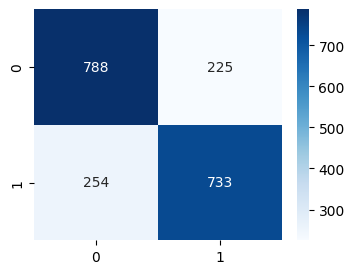

In [ ]:
cm = confusion_matrix(y_test,y_pred_lr)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')

In [ ]:
#SVM

from sklearn.svm import SVC
svm = SVC(kernel ='linear')
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
print("SVM sonuçları")
print("Doğruluk: ",accuracy_score(y_test,y_pred_svm))
print("F1 score: ",f1_score(y_test,y_pred_svm))
print("Hassasiyet: ",recall_score(y_test,y_pred_svm))
print("Kesinlik: ",precision_score(y_test,y_pred_svm))

SVM sonuçları
Doğruluk:  0.7635
F1 score:  0.755807950438823
Hassasiyet:  0.7416413373860182
Kesinlik:  0.7705263157894737


<Axes: >

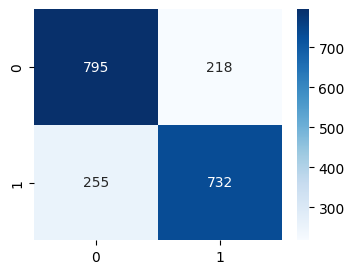

In [ ]:
cm = confusion_matrix(y_test,y_pred_svm)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')

In [ ]:
import tensorflow as tf

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer

In [ ]:
from transformers import TFBertForSequenceClassification

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset('ag_news')

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
def tokenize_function(examples):
  return tokenizer(examples['text'],padding='max_length',max_length=128)

In [ ]:
tokenized_dataset=dataset.map(tokenize_function,batched=True)

Map:   0%|          | 0/120000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]